In [1]:
!pip install seaborn --quiet


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline


In [3]:
## Downloading data set
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'


In [4]:
from urllib.request import urlretrieve

In [5]:
urlretrieve(medical_charges_url,"medical.csv")

('medical.csv', <http.client.HTTPMessage at 0x15ac28e20>)

In [6]:

data = pd.read_csv('/Users/harshkulkarni/Downloads/medical.csv')
data.head()


FileNotFoundError: [Errno 2] No such file or directory: '/Users/harshkulkarni/Downloads/medical.csv'

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<AxesSubplot: xlabel='bmi', ylabel='charges'>

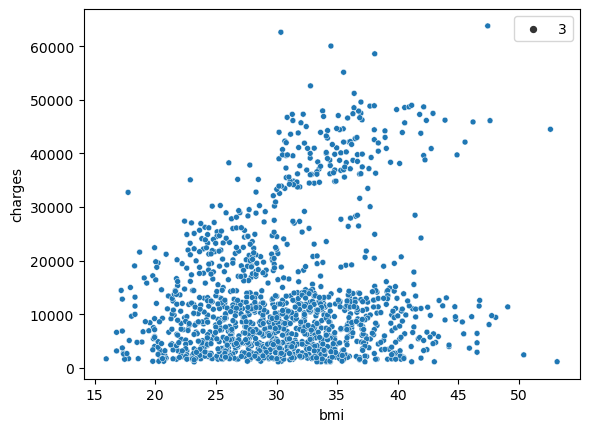

In [ ]:
sns.scatterplot(x=data.bmi,y=data.charges,size=3)

In [ ]:

##we are going to select age feature only
x=np.array(data.bmi)
y=np.array(data.charges)
print(x)
print(y)

[27.9  33.77 33.   ... 36.85 25.8  29.07]
[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


In [ ]:
def cost_Func(w,x,y,b):
    m=x.size
    J = (np.sum(np.square((w*x+b)-y)))/(2*m)
    return J

In [ ]:
def transform(x, y):
    ##   Z-Score Transform ##
    ## (x,y)
    varience1 = (np.var(x))
    mean1 = (np.mean(x))
    x = (x-mean1)/np.sqrt(varience1)
    varience2 = (np.var(y))
    mean2 = (np.mean(y))
    y = (y-mean2)/np.sqrt(varience2)
    return x, y

In [ ]:

def Gradient_descent(w, b, x, y):
    j=0
    m=x.size
    alpha=0.001 ##learning rate
    number_of_iterations=5000
    itrations = np.array([])
    p_J = np.array([])
    while(j<number_of_iterations):
        arr_temp =  np.array([cost_Func(w, x, y, b)])
        p_J=np.append(p_J, arr_temp)
        itrations=np.append(itrations, [j])
        temp_w = w-(alpha*(np.mean(((w*x+b)-y)*x)))
        temp_b = b- (alpha*(np.mean(((w*x+b)-y))))
        w=temp_w
        b=temp_b
        j+=1
    return w, b, p_J, itrations


[-0.45332     0.5096211   0.38330685 ...  1.0148781  -0.79781341
 -0.26138796]
Intital cost function is 4.904977093499113
After cost function is 0.48053030613562325


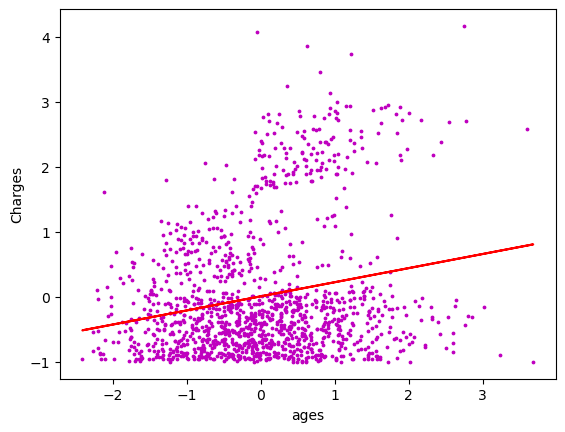

In [ ]:

##      Linear Regression Model     ##

##Featue Scaling and transformation
x,y=transform(x,y)
print(x)
w1 = cost_Func(3, x, y, 1)
print("Intital cost function is", w1)
w, b, Cost ,no= Gradient_descent(3, 1, x, y)
#Now with Minima cost function obtained from Gradient descent
#Put values of w,b for regression
y_predict=w*x+b
w2 = (cost_Func(w, x, y, b))
print("After cost function is", w2)
plt.plot(x,y_predict, color='red')
plt.scatter(x, y, color="m",marker="o", s=3)
plt.xlabel('ages')
plt.ylabel('Charges')
plt.show()



Cost function vs no of iterations


<AxesSubplot: >

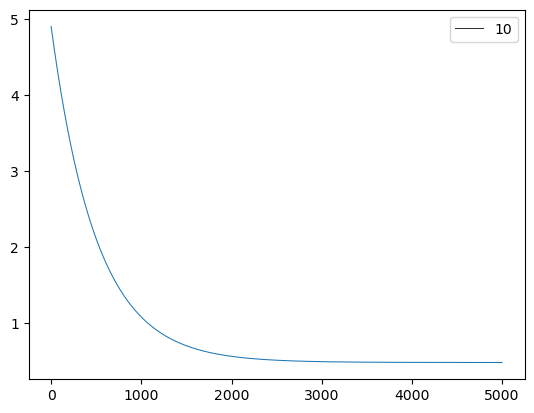

In [ ]:
print("Cost function vs no of iterations")
sns.lineplot(x=no, y=Cost, size_order=100,size=10)
